In [63]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
  
# fetch dataset 
contraceptive_method_choice = fetch_ucirepo(id=30) 
  
# data (as pandas dataframes) 
X = contraceptive_method_choice.data.features 
y = contraceptive_method_choice.data.targets 
  
# metadata 
print(contraceptive_method_choice.metadata) 
  
# variable information 
print(contraceptive_method_choice.variables) 

{'uci_id': 30, 'name': 'Contraceptive Method Choice', 'repository_url': 'https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice', 'data_url': 'https://archive.ics.uci.edu/static/public/30/data.csv', 'abstract': 'Dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1473, 'num_features': 9, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Education Level', 'Other', 'Occupation'], 'target_col': ['contraceptive_method'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C59W2D', 'creators': ['Tjen-Sien Lim'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either

In [64]:
data = pd.concat([X, y], axis=1)

## 2. Coleta Inicial

Tamanho dos Dados

In [65]:
data.shape

(1473, 10)

Exemplo de Registros dos dados

In [66]:
data.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


## Descrição dos Dados

Tipos dos dados

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   wife_age                  1473 non-null   int64
 1   wife_edu                  1473 non-null   int64
 2   husband_edu               1473 non-null   int64
 3   num_children              1473 non-null   int64
 4   wife_religion             1473 non-null   int64
 5   wife_working              1473 non-null   int64
 6   husband_occupation        1473 non-null   int64
 7   standard_of_living_index  1473 non-null   int64
 8   media_exposure            1473 non-null   int64
 9   contraceptive_method      1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


Estatísticas descritídas

In [68]:
data.describe()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


Distribuição + Visualização

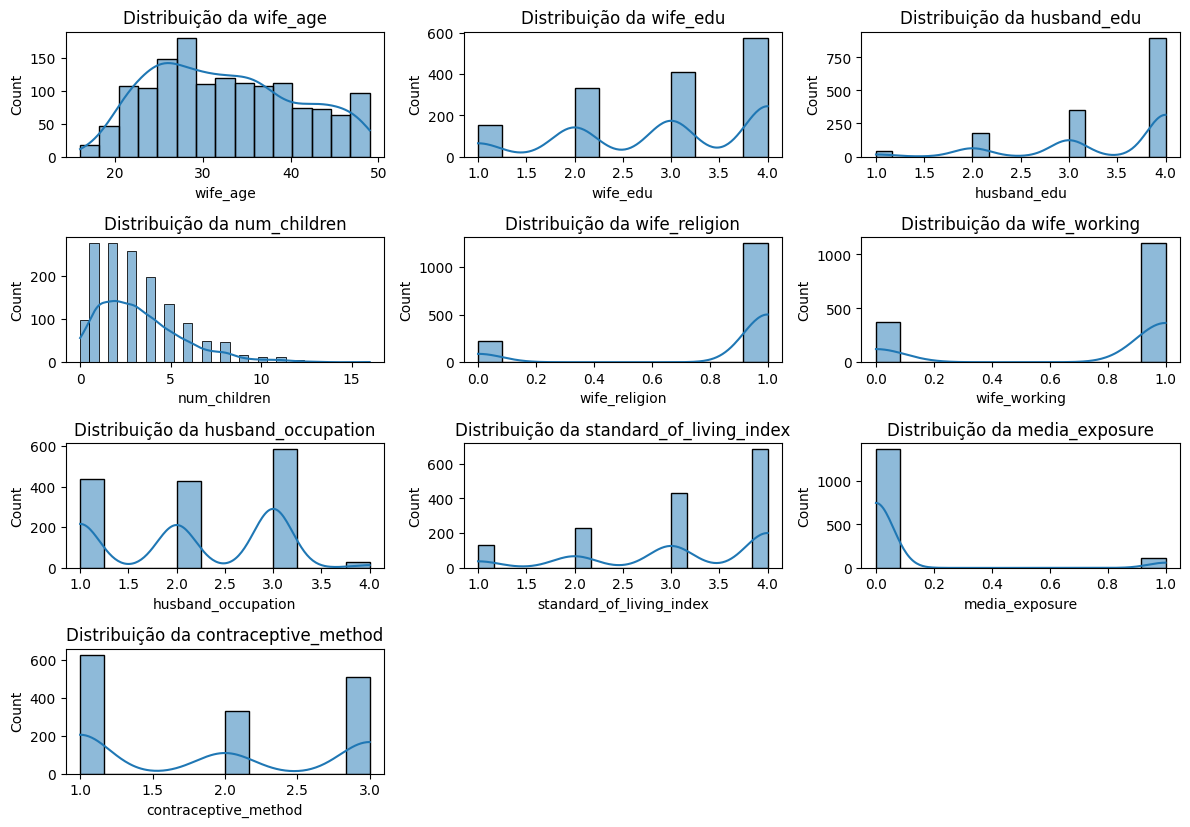

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribuição da {column}')
plt.tight_layout()
plt.show()

## Exploração dos Dados

Valores Ausentes

In [70]:
data.isnull().sum().sort_values()

wife_age                    0
wife_edu                    0
husband_edu                 0
num_children                0
wife_religion               0
wife_working                0
husband_occupation          0
standard_of_living_index    0
media_exposure              0
contraceptive_method        0
dtype: int64

Outliers

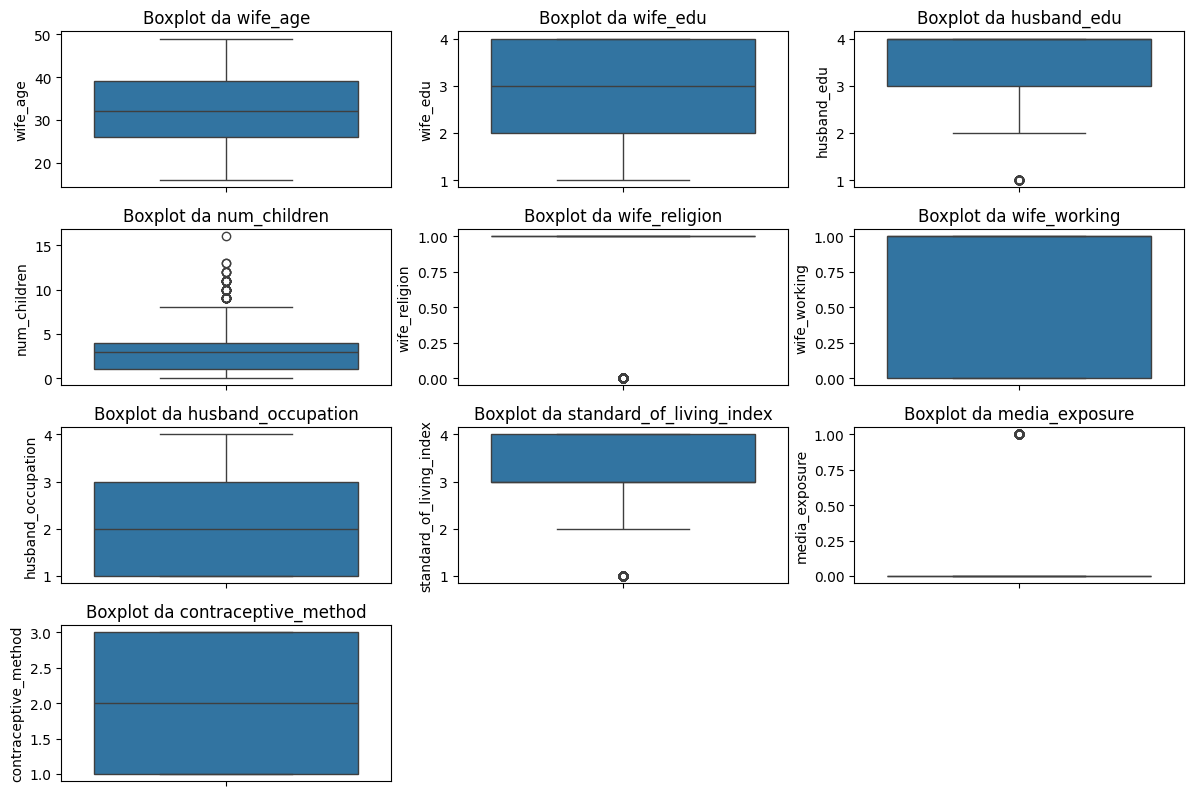

In [71]:
import numpy as np

plt.figure(figsize=(12, 10))
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot da {column}')
plt.tight_layout()
plt.show()

Analise de correlações

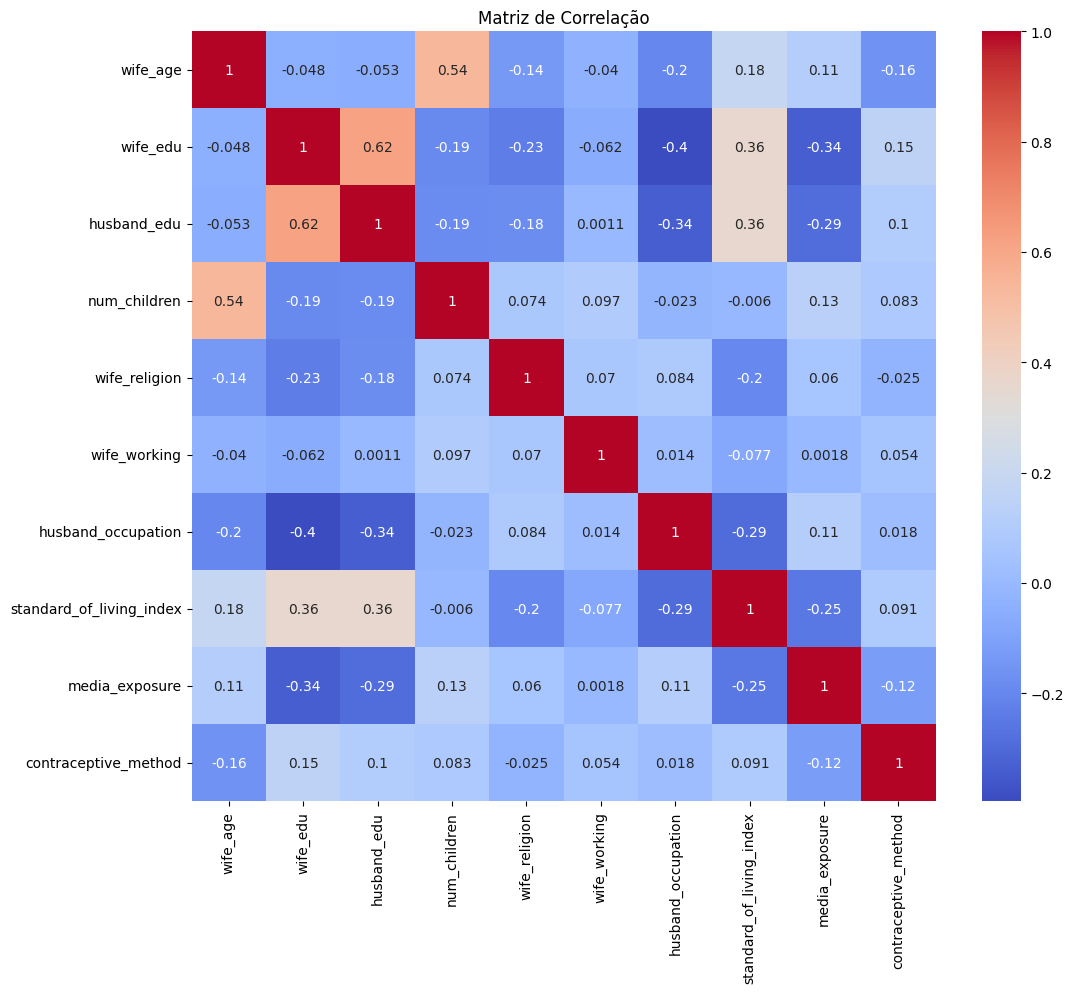

In [72]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Visualizações adicionais (pair plots)

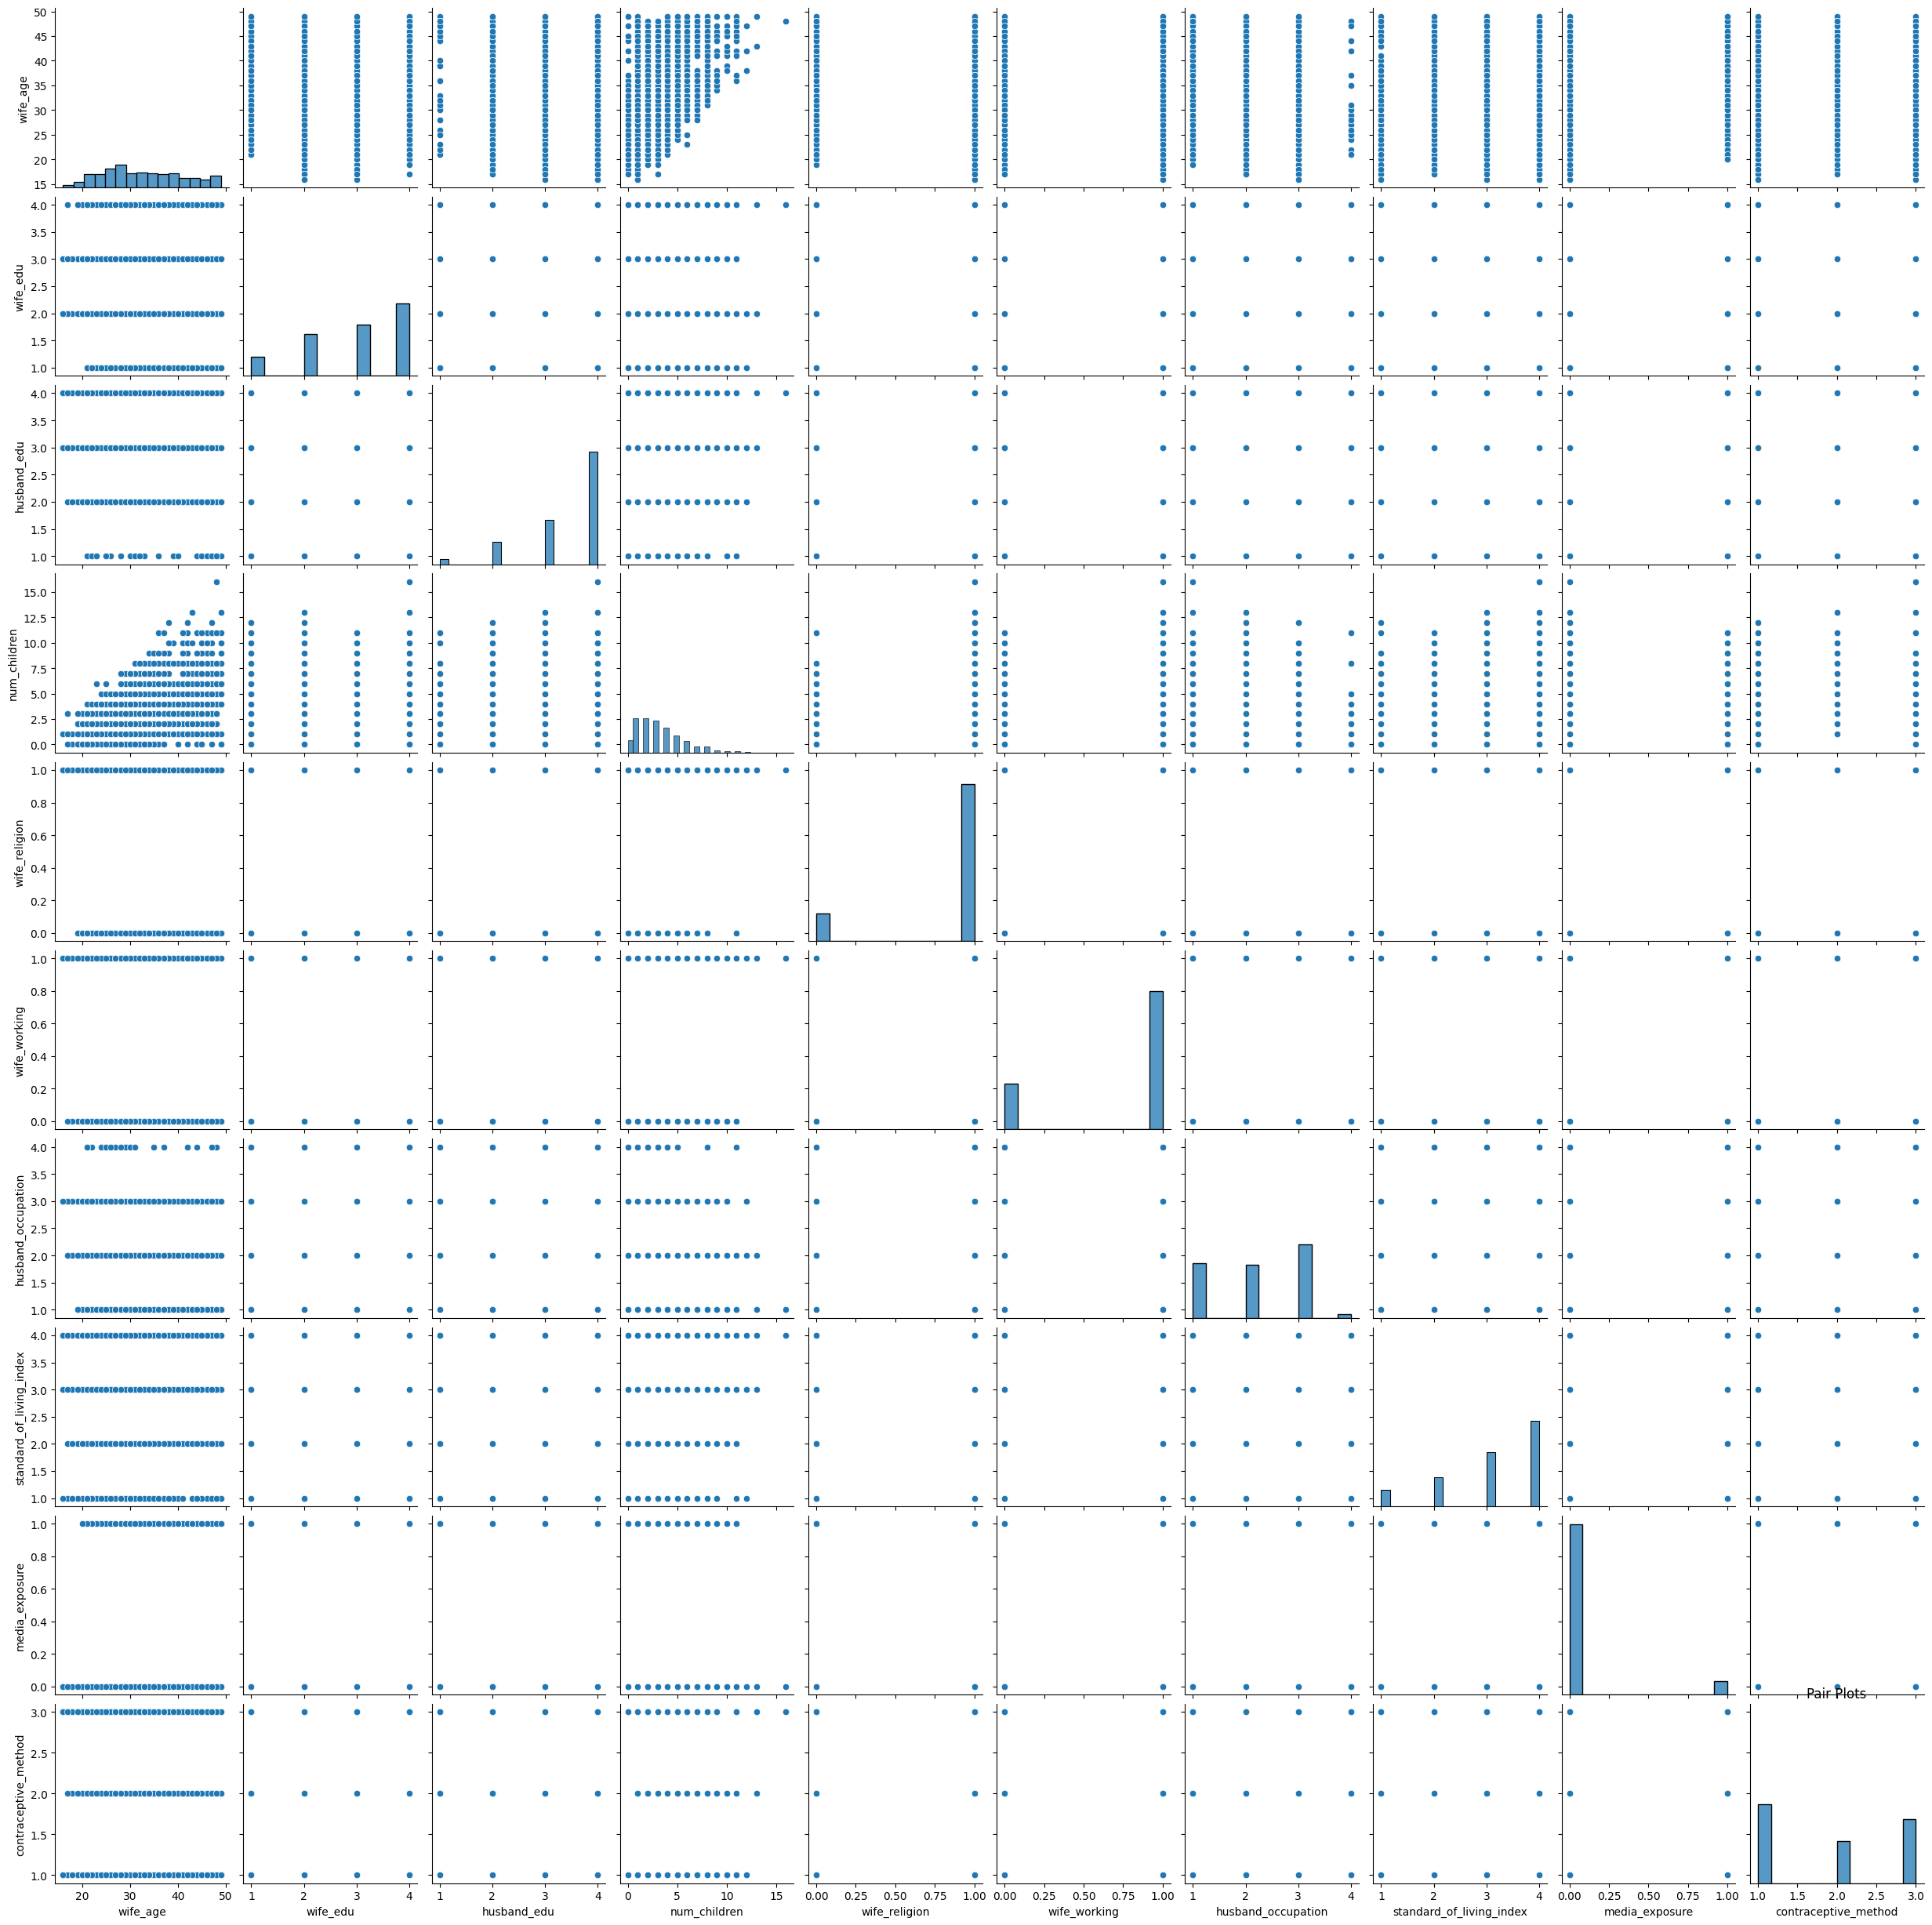

In [73]:
sns.pairplot(data)
plt.title('Pair Plots')
plt.show()

## 5. Qualidade dos dados

In [74]:
data.duplicated().sum()

np.int64(48)

## Preparação dos dados

Split the dataset

In [75]:
X = data.drop(columns='contraceptive_method')
y = data['contraceptive_method']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

Concatenate the training data to perform preprocessing steps

In [76]:
train_data = X_train.copy()
train_data['contraceptive_method'] = y_train

Remove duplicates in the training data

In [77]:
train_data.drop_duplicates(inplace=True)

Remove outliers in the numeric columns of the training data

In [78]:
numeric_columns = ['wife_age', 'num_children']

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First Quartile
        Q3 = df[col].quantile(0.75)  # Third Quartile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Filter data
    return df

train_data = remove_outliers_iqr(train_data, numeric_columns)

Re-split the processed training data back into features and target

In [79]:
X_train = train_data.drop(columns='contraceptive_method')
y_train = train_data['contraceptive_method']

Continue with the preprocessing pipeline scaling the numerical features

In [80]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
    ]
)
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Apply SMOTE on the processed training data

In [84]:
smote = SMOTE(random_state=45)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

Show statistics after processing the data

In [96]:
resampled_df = pd.DataFrame(X_train_resampled)
resampled_df['contraceptive_method'] = y_train_resampled

In [97]:
resampled_df.describe()

,wife_age,num_children,contraceptive_method
count,1293.000000,1293.000000,1293.000000
mean,32.582367,3.276102,2.000000
std,8.028417,2.228862,0.816813
min,16.000000,0.000000,1.000000
25%,26.000000,2.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,11.000000,3.000000


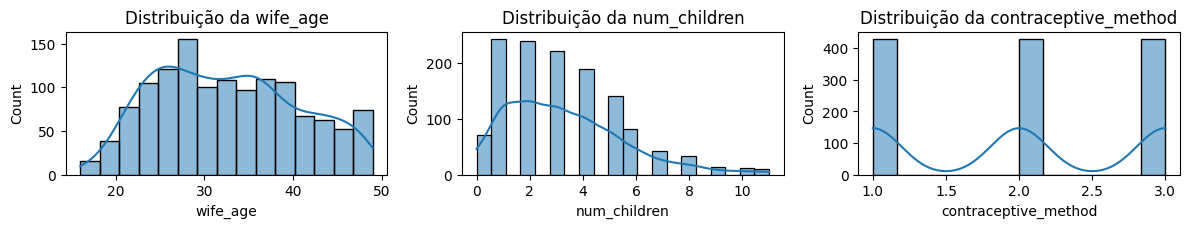

In [98]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(resampled_df.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(resampled_df[column], kde=True)
    plt.title(f'Distribuição da {column}')
plt.tight_layout()
plt.show()

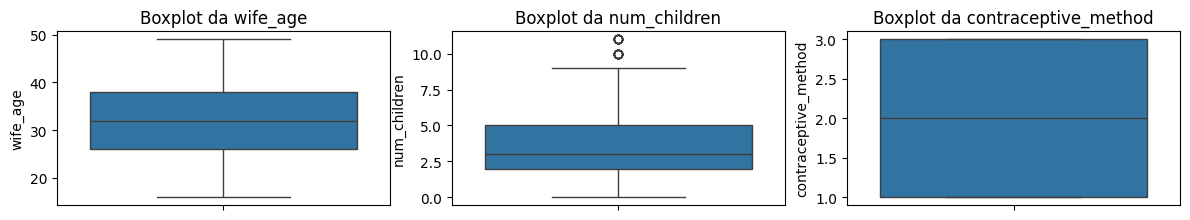

In [99]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(resampled_df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(resampled_df[column])
    plt.title(f'Boxplot da {column}')
plt.tight_layout()
plt.show()

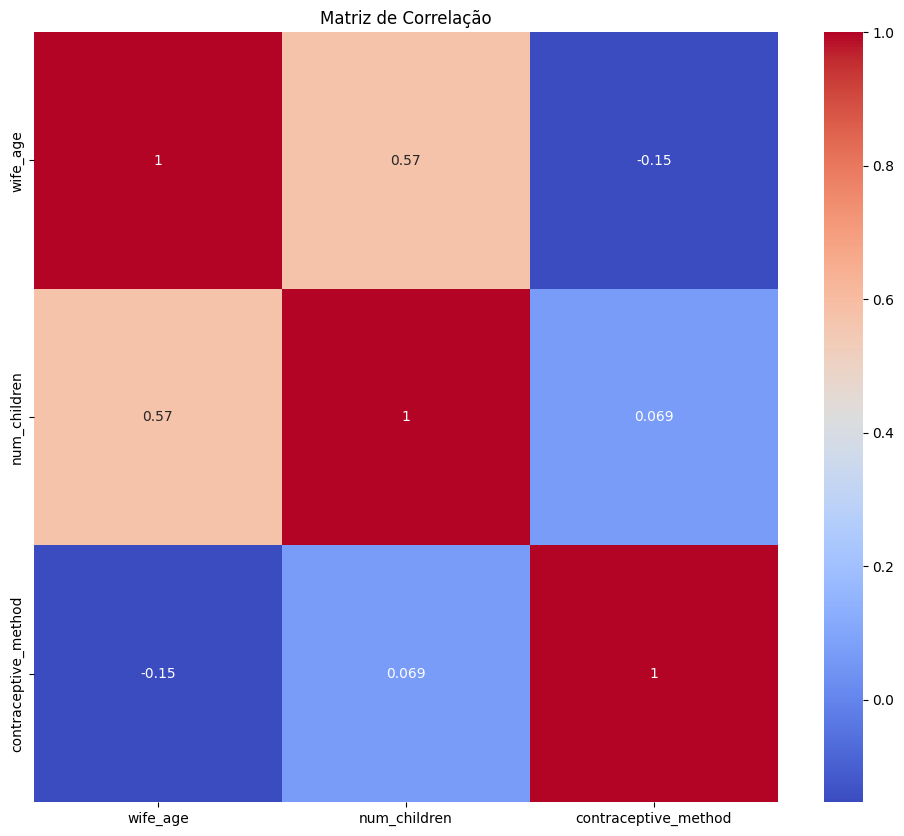

In [100]:
correlation_matrix = resampled_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()